In [28]:
from PIL import Image, ImageDraw
import pandas as pd
import numpy as np
import pyarrow as pa
from tqdm import tqdm, trange, tqdm_notebook
from time import sleep
from math import sqrt
import glob
import os
import re
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

from sklearn.pipeline import make_pipeline
from sklearn import datasets
# #Iris Dataset
# iris = datasets.load_iris()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()

import pandas as pd
from sklearn import preprocessing
import boto3
import io
import pandas as pd
import pyarrow.parquet as pq

from pandas import DataFrame
import pyspark
from pyspark.sql import SparkSession
import plotly
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.context import SparkContext

sc = SparkContext("local", "App Name")



ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=App Name, master=local) created by __init__ at <ipython-input-1-f46a578086fc>:43 

In [29]:
from os import listdir
from os.path import isfile, join
mypath = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [30]:
TILE_X = 7680
TILE_Y = 10240

(start_x, start_y) = (0, 0)
(size_x, size_y) = (512, 512)

cropbox = (start_x, start_y, start_x + size_x, start_y + size_y)

In [31]:
# Get the physical path to the PNG image containing the mask file
def get_mask_path(tile_x, tile_y):
    path = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\'
    path += f"masks\\mask-x{tile_x}-y{tile_y}.png"
    #path += f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    #path = f'E:\work\canecrushers\phase-01\data\sentinel-2a-tile-7680x-10240y\timeseries\'
    return path

mask_path = get_mask_path(TILE_X, TILE_Y)
print(mask_path)
# assert os.path.isfile(mask_path)


C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\masks\mask-x7680-y10240.png


In [32]:
def open_image(path, mode = None, cropbox = None, verbose = True):
    if verbose:
        print(path)
    img = Image.open(path)
    if cropbox is not None:
        img = img.crop(cropbox)
    if mode is not None:
        img = img.convert(mode)
    if verbose:
        print("Format: {0}\nSize: {1}\nMode: {2}".format(img.format, img.size, img.mode))
        (width, height) = img.size
        print('width:',width,'height:',height)
    return img

C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\masks\mask-x7680-y10240.png
Format: None
Size: (512, 512)
Mode: P
width: 512 height: 512


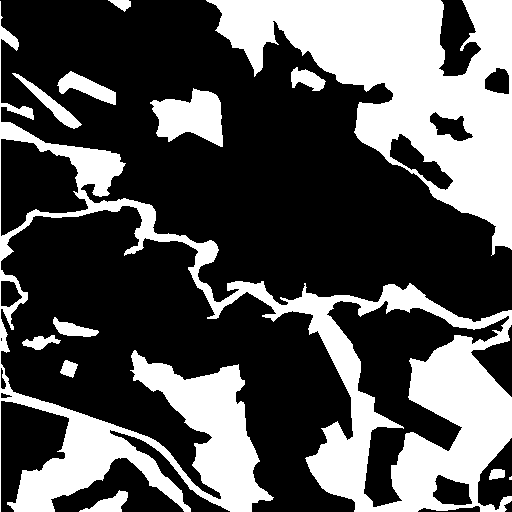

In [33]:
masp = open_image(mask_path, mode = 'P', cropbox = cropbox)
masp

In [156]:
# Mask Functions from Simar
def get_mask_path(tile_x, tile_y):
    path = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\'
    path += f"masks\\mask-x{tile_x}-y{tile_y}.png"
#     path = f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    return path


def load_image(tile_path):
    img = Image.open(tile_path)
    return img


def get_tile_pixels(img):
    pixels = img.load()
    return pixels


def plot_image(img):
    plt.imshow(img)
    

def is_in_mask(mask_pixels, pixel_x, pixel_y):
    if mask_pixels[pixel_y, pixel_x] == (0, 0, 0, 255):
        return True
    else:
        return False
    
def pixels_in_mask(tile_x, tile_y):
    pixel_list = []
    
    mask_path = get_mask_path(tile_x, tile_y)    
    mask_img = load_image(mask_path)    
    mask_pix = get_tile_pixels(mask_img)    
    mask_img_size = mask_img.size
    
    for pixel_x in range(0,mask_img.size[0]):
        for pixel_y in range(0,mask_img.size[1]):
            in_mask = is_in_mask(mask_pix, pixel_x, pixel_y)
            if in_mask:
                pixel_list.append(str(pixel_y)+ " "+ str(pixel_x))
    return pixel_list

In [157]:
get_tile_pixels(load_image(mask_path))

In [158]:
mask_pixels = pixels_in_mask(7680, 10240)
len(mask_pixels)


174278

In [143]:
# mask_pixels

In [34]:
def open_image(path, mode = None, cropbox = None, verbose = True):
    if verbose:
        print(path)
    img = Image.open(path)
    if cropbox is not None:
        img = img.crop(cropbox)
    if mode is not None:
        img = img.convert(mode)
    if verbose:
        print("Format: {0}\nSize: {1}\nMode: {2}".format(img.format, img.size, img.mode))
        (width, height) = img.size
        print('width:',width,'height:',height)
    return img

In [35]:
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\'
    path += f"sugarcanetiles\\{tile_x}-{tile_y}-{band}*.png"
    #print(path)
    images = glob.glob(path)
    return images

In [36]:
tci_list = get_timeseries_image_paths(TILE_X, TILE_Y, 'TCI')
tci_list[-1]

'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2019-08-09.png'

In [37]:
def last_date_in_path(path):
    return re.findall('\d{4}-\d{2}-\d{2}',path)[-1]

test_path = tci_list[-1]
print(test_path)
print(last_date_in_path(test_path))

C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\sugarcanetiles\7680-10240-TCI-2019-08-09.png
2019-08-09


In [38]:
tci_list


['C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2016-12-22.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-01-01.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-01-11.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-02-10.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-02-20.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-03-02.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-03-12.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-04-01.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetile

In [39]:
def read_img_pixel_values(tile_x, tile_y, date, *args):
    """ return array of arrays 
        one array for each pixel (10m X 10 m), containing 
        an array for each spectrum value for the pixel
    """
    int_max = 2**15-1
    for img in (args):
        assert img.size == args[0].size
    (width, height) = args[0].size
    #print('width',width,'height',height)

    pixl_list = [img.load() for img in args]

    result_list = []
    for x in range(0, width):
        for y in range(0, height):
            val_list = [tile_x, tile_y, x, y, date]
            for pix in pixl_list:
                val = pix[x,y]
                if isinstance(val, tuple):
                    val_list.extend(val)
                else:
                    val_list.append(val)
            #print(val_list)
            result_list.append(val_list)
    return result_list

In [40]:
def write_to_excel(df, file_name, sheet_name='sheet1'):
    writer = pd.ExcelWriter(file_name, engine='xlsxwriter')
    df.to_excel(writer, sheet_name=sheet_name)
    writer.save()

In [41]:
columns = ['tile_x','tile_y', 'x','y', 'date', 'mask', 'red','green','blue', ]
columns.extend([f'B{b:02d}' for b in range(1,13)])
print(columns)

['tile_x', 'tile_y', 'x', 'y', 'date', 'mask', 'red', 'green', 'blue', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12']


In [42]:
b_name_list = [f'B{b:02d}' for b in range(1,13)]
b_path_lol = [get_timeseries_image_paths(TILE_X, TILE_Y, b) for b in b_name_list]
b_path_lol[-5][-1]

'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-B08-2019-08-09.png'

In [43]:
def read_img_pixel_values(tile_x, tile_y, date, *args):
    """ return array of arrays 
        one array for each pixel (10m X 10 m), containing 
        an array for each spectrum value for the pixel
    """
    int_max = 2**15-1
    for img in (args):
        assert img.size == args[0].size
    (width, height) = args[0].size
    #print('width',width,'height',height)

    pixl_list = [img.load() for img in args]

    result_list = []
    for x in range(0, width):
        for y in range(0, height):
            val_list = [tile_x, tile_y, x, y, date]
            for pix in pixl_list:
                val = pix[x,y]
                if isinstance(val, tuple):
                    val_list.extend(val)
                else:
                    val_list.append(val)
            #print(val_list)
            result_list.append(val_list)
    return result_list

In [44]:
IterrateTiles = pd.DataFrame()
IterrateTiles['Unclean'] = onlyfiles
IterrateTiles['Unclean'].str.split('-',expand=True)
IterrateTiles['X Tile'] =  IterrateTiles['Unclean'].str.split('-',expand=True)[0]
IterrateTiles['Y Tile'] =  IterrateTiles['Unclean'].str.split('-',expand=True)[1]
IterrateTiles.head()

Unclean X Tile Y Tile
0  1536-1024-B01-2016-12-22.png   1536   1024
1  1536-1024-B01-2017-01-01.png   1536   1024
2  1536-1024-B01-2017-01-11.png   1536   1024
3  1536-1024-B01-2017-02-10.png   1536   1024
4  1536-1024-B01-2017-02-20.png   1536   1024

In [94]:
# b_img_list
# tci_img
len(tci_list)

71

In [ ]:
#for tci_path, b_path_list in tqdm(list(zip(tci_list,b_path_lol))):
ModelDF = pd.DataFrame()
assert len(tci_list) == len(b_path_lol[0])
(tile_x, tile_y) = (TILE_X, TILE_Y)
for day_no in trange(0,2): # len(tci_list)):
    tci_path = tci_list[day_no]
    date = last_date_in_path(tci_path)
    b_path_list = [b_path_list[day_no] for b_path_list in b_path_lol]

    tci_img = open_image(tci_path, cropbox = cropbox, verbose=False)
    b_img_list = [open_image(b_path, cropbox = cropbox, verbose=False) for b_path in b_path_list]

    data = read_img_pixel_values(tile_x, tile_y, date, masp, tci_img, *b_img_list)

    df = pd.DataFrame(columns=columns, data=data)
    # apply a very very simple havested rules
    df['clouds'] = df.apply(lambda df : df.red == df.green and df.red == df.blue, axis=1)
    df['havested'] = df.apply(lambda df : df.red > df.green, axis=1)

    # Calculate Indices:
    # https://support.micasense.com/hc/en-us/articles/227837307-An-overview-of-the-available-layers-and-indices-in-Atlas
    # https://support.micasense.com/hc/en-us/articles/226531127-Creating-agricultural-indices-NDVI-NDRE-from-an-Atlas-GeoTIFF-in-QGIS-
    # https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm
    # https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/
    # NDVI ref: https://medium.com/analytics-vidhya/satellite-imagery-analysis-with-python-3f8ccf8a7c32

    # NDVI - Normalised Difference Vegetation Index (NDVI)
    #  = (NIR - RED) / (NIR + RED)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_361.js
    df['NDVI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B04)) / (df.B08 + df.B04)) , axis=1)

    # GNDVI - Green Normalized Difference NDVI
    #  = (NIR - GREEN)/(NIR + GREEN)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTm9ybWFsaXplZCBEaWZmZXJlbmNlIE5JUi9HcmVlbiBHcmVlbiBORFZJIChhYmJydi4gR05EVkkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKE5JUi1HUkVFTikvKE5JUitHUkVFTikKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD00MDEKLy8KCmxldCBpbmRleCA9IChCMDggLSBCMDMpIC8gKEIwOCArIEIwMyk7CmxldCBtaW4gPSAtMC44OTsKbGV0IG1heCA9IDAuODk7CmxldCB6ZXJvID0gMC4wOwoKLy8gY29sb3JCbGVuZCB3aWxsIHJldHVybiBhIGNvbG9yIHdoZW4gdGhlIGluZGV4IGlzIGJldHdlZW4gbWluIGFuZCBtYXggYW5kIHdoaXRlIHdoZW4gaXQgaXMgbGVzcyB0aGFuIG1pbi4KLy8gVG8gc2VlIGJsYWNrIHdoZW4gaXQgaXMgbW9yZSB0aGFuIG1heCwgdW5jb21tZW50IHRoZSBsYXN0IGxpbmUgb2YgY29sb3JCbGVuZC4KLy8gVGhlIG1pbi9tYXggdmFsdWVzIHdlcmUgY29tcHV0ZWQgYXV0b21hdGljYWxseSBhbmQgbWF5IGJlIHBvb3JseSBzcGVjaWZpZWQsIGZlZWwgZnJlZSB0byBjaGFuZ2UgdGhlbSB0byB0d2VhayB0aGUgZGlzcGxheWVkIHJhbmdlLgovLyBUaGlzIGluZGV4IGNyb3NzZXMgemVybywgc28gYSBkaXZlcmdpbmcgY29sb3IgbWFwIGlzIHVzZWQuIFRvIHR3ZWFrIHRoZSB2YWx1ZSBvZiB0aGUgYnJlYWsgaW4gdGhlIGNvbG9yIG1hcCwgY2hhbmdlIHRoZSB2YXJpYWJsZSAnemVybycuCgpsZXQgdW5kZXJmbG93X2NvbG9yID0gWzEsIDEsIDFdOwpsZXQgbG93X2NvbG9yID0gWzIwOC8yNTUsIDg4LzI1NSwgMTI2LzI1NV07CmxldCBoaWdoX2NvbG9yID0gWzI0MS8yNTUsIDIzNC8yNTUsIDIwMC8yNTVdOwpsZXQgemVyb19jb2xvciA9IFswLCAxNDcvMjU1LCAxNDYvMjU1XTsKbGV0IG92ZXJmbG93X2NvbG9yID0gWzAsIDAsIDBdOwoKcmV0dXJuIGNvbG9yQmxlbmQoaW5kZXgsIFttaW4sIG1pbiwgemVybywgbWF4XSwKWwoJdW5kZXJmbG93X2NvbG9yLAoJbG93X2NvbG9yLAoJemVyb19jb2xvciwgLy8gZGl2ZXJnZW50IHN0ZXAgYXQgemVybwoJaGlnaF9jb2xvciwKCS8vb3ZlcmZsb3dfY29sb3IgLy8gdW5jb21tZW50IHRvIHNlZSBvdmVyZmxvd3MKXSk7DQo%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_401.js
    df['GNDVI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B03)) / (df.B08 + df.B03)) , axis=1)

    # RDVI - Normalised Difference Vegetation Index (NDVI)
    #  = 2*(NIR - RED) / sqrt(NIR + RED)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gUmVub3JtYWxpemVkIERpZmZlcmVuY2UgVmVnZXRhdGlvbiBJbmRleCAgIChhYmJydi4gUkRWSSkKLy8KLy8gR2VuZXJhbCBmb3JtdWxhOiAoODAwbm0gLSA2NzBubSkgL3NxcnQoODAwbm0gKyA2NzBubSkwLjUKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD03NgovLwoKbGV0IGluZGV4ID0gKEIwOCAtIEIwNCkgLyBNYXRoLnNxcnQoQjA4ICsgQjA0KSAqIDAuNTsKbGV0IG1pbiA9IC0wLjI2NjsKbGV0IG1heCA9IDAuMjY2OwpsZXQgemVybyA9IDAuMDsKCi8vIGNvbG9yQmxlbmQgd2lsbCByZXR1cm4gYSBjb2xvciB3aGVuIHRoZSBpbmRleCBpcyBiZXR3ZWVuIG1pbiBhbmQgbWF4IGFuZCB3aGl0ZSB3aGVuIGl0IGlzIGxlc3MgdGhhbiBtaW4uCi8vIFRvIHNlZSBibGFjayB3aGVuIGl0IGlzIG1vcmUgdGhhbiBtYXgsIHVuY29tbWVudCB0aGUgbGFzdCBsaW5lIG9mIGNvbG9yQmxlbmQuCi8vIFRoZSBtaW4vbWF4IHZhbHVlcyB3ZXJlIGNvbXB1dGVkIGF1dG9tYXRpY2FsbHkgYW5kIG1heSBiZSBwb29ybHkgc3BlY2lmaWVkLCBmZWVsIGZyZWUgdG8gY2hhbmdlIHRoZW0gdG8gdHdlYWsgdGhlIGRpc3BsYXllZCByYW5nZS4KLy8gVGhpcyBpbmRleCBjcm9zc2VzIHplcm8sIHNvIGEgZGl2ZXJnaW5nIGNvbG9yIG1hcCBpcyB1c2VkLiBUbyB0d2VhayB0aGUgdmFsdWUgb2YgdGhlIGJyZWFrIGluIHRoZSBjb2xvciBtYXAsIGNoYW5nZSB0aGUgdmFyaWFibGUgJ3plcm8nLgoKbGV0IHVuZGVyZmxvd19jb2xvciA9IFsxLCAxLCAxXTsKbGV0IGxvd19jb2xvciA9IFsyMDgvMjU1LCA4OC8yNTUsIDEyNi8yNTVdOwpsZXQgaGlnaF9jb2xvciA9IFsyNDEvMjU1LCAyMzQvMjU1LCAyMDAvMjU1XTsKbGV0IHplcm9fY29sb3IgPSBbMCwgMTQ3LzI1NSwgMTQ2LzI1NV07CmxldCBvdmVyZmxvd19jb2xvciA9IFswLCAwLCAwXTsKCnJldHVybiBjb2xvckJsZW5kKGluZGV4LCBbbWluLCBtaW4sIHplcm8sIG1heF0sClsKCXVuZGVyZmxvd19jb2xvciwKCWxvd19jb2xvciwKCXplcm9fY29sb3IsIC8vIGRpdmVyZ2VudCBzdGVwIGF0IHplcm8KCWhpZ2hfY29sb3IsCgkvL292ZXJmbG93X2NvbG9yIC8vIHVuY29tbWVudCB0byBzZWUgb3ZlcmZsb3dzCl0pOw0K&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_76.js
    df['RDVI'] = df.apply(lambda df : int(10000 * 2 * (float(df.B08) - float(df.B04)) / sqrt(df.B08 + df.B04)) , axis=1)

    # RBNDVI - Red Blue Normalised Difference Vegetation Index (NDVI)
    #  = (NIR - RED -BLUE) / (NIR + RED + BLUE)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gUmVkLUJsdWUgTkRWSSAgKGFiYnJ2LiBSQk5EVkkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKE5JUi0oUkVEK0JMVUUpKS8oTklSKyhSRUQrQkxVRSkpCi8vCi8vIFVSTCBodHRwczovL3d3dy5pbmRleGRhdGFiYXNlLmRlL2RiL3NpLXNpbmdsZS5waHA%2Fc2Vuc29yX2lkPTk2JnJzaW5kZXhfaWQ9MTg3Ci8vCgpsZXQgaW5kZXggPSAoQjA4IC0gKEIwNCArIEIwMikpIC8gKEIwOCArIChCMDQgKyBCMDIpKTsKbGV0IG1pbiA9IC0wLjkzOTsKbGV0IG1heCA9IDAuNTI5OwpsZXQgemVybyA9IDAuMDsKCi8vIGNvbG9yQmxlbmQgd2lsbCByZXR1cm4gYSBjb2xvciB3aGVuIHRoZSBpbmRleCBpcyBiZXR3ZWVuIG1pbiBhbmQgbWF4IGFuZCB3aGl0ZSB3aGVuIGl0IGlzIGxlc3MgdGhhbiBtaW4uCi8vIFRvIHNlZSBibGFjayB3aGVuIGl0IGlzIG1vcmUgdGhhbiBtYXgsIHVuY29tbWVudCB0aGUgbGFzdCBsaW5lIG9mIGNvbG9yQmxlbmQuCi8vIFRoZSBtaW4vbWF4IHZhbHVlcyB3ZXJlIGNvbXB1dGVkIGF1dG9tYXRpY2FsbHkgYW5kIG1heSBiZSBwb29ybHkgc3BlY2lmaWVkLCBmZWVsIGZyZWUgdG8gY2hhbmdlIHRoZW0gdG8gdHdlYWsgdGhlIGRpc3BsYXllZCByYW5nZS4KLy8gVGhpcyBpbmRleCBjcm9zc2VzIHplcm8sIHNvIGEgZGl2ZXJnaW5nIGNvbG9yIG1hcCBpcyB1c2VkLiBUbyB0d2VhayB0aGUgdmFsdWUgb2YgdGhlIGJyZWFrIGluIHRoZSBjb2xvciBtYXAsIGNoYW5nZSB0aGUgdmFyaWFibGUgJ3plcm8nLgoKbGV0IHVuZGVyZmxvd19jb2xvciA9IFsxLCAxLCAxXTsKbGV0IGxvd19jb2xvciA9IFsyMDgvMjU1LCA4OC8yNTUsIDEyNi8yNTVdOwpsZXQgaGlnaF9jb2xvciA9IFsyNDEvMjU1LCAyMzQvMjU1LCAyMDAvMjU1XTsKbGV0IHplcm9fY29sb3IgPSBbMCwgMTQ3LzI1NSwgMTQ2LzI1NV07CmxldCBvdmVyZmxvd19jb2xvciA9IFswLCAwLCAwXTsKCnJldHVybiBjb2xvckJsZW5kKGluZGV4LCBbbWluLCBtaW4sIHplcm8sIG1heF0sClsKCXVuZGVyZmxvd19jb2xvciwKCWxvd19jb2xvciwKCXplcm9fY29sb3IsIC8vIGRpdmVyZ2VudCBzdGVwIGF0IHplcm8KCWhpZ2hfY29sb3IsCgkvL292ZXJmbG93X2NvbG9yIC8vIHVuY29tbWVudCB0byBzZWUgb3ZlcmZsb3dzCl0pOw0K&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_187.js
    df['RBNDVI'] = df.apply(lambda df : int(10000 * (2*float(df.B08) - float(df.B04) - float(df.B02)) / (2*df.B08 + df.B04 + df.B02)) , axis=1)

    # LCI - Leaf Chlorophyll Index
    #  = (NIR - REDE)/(NIR + REDE)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTGVhZiBDaGxvcm9waHlsbCBJbmRleCAgKGFiYnJ2LiBMQ0kpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFs4NTBdLVs3MTBdKS8oWzg1MF0rWzY4MF0pCi8vCi8vIFVSTCBodHRwczovL3d3dy5pbmRleGRhdGFiYXNlLmRlL2RiL3NpLXNpbmdsZS5waHA%2Fc2Vuc29yX2lkPTk2JnJzaW5kZXhfaWQ9MTA5Ci8vCgpsZXQgaW5kZXggPSAoQjA4IC0gQjA1KSAvIChCMDggKyBCMDQpOwpsZXQgbWluID0gLTIuNzk4OwpsZXQgbWF4ID0gMC43MzU7CmxldCB6ZXJvID0gMC4wOwoKLy8gY29sb3JCbGVuZCB3aWxsIHJldHVybiBhIGNvbG9yIHdoZW4gdGhlIGluZGV4IGlzIGJldHdlZW4gbWluIGFuZCBtYXggYW5kIHdoaXRlIHdoZW4gaXQgaXMgbGVzcyB0aGFuIG1pbi4KLy8gVG8gc2VlIGJsYWNrIHdoZW4gaXQgaXMgbW9yZSB0aGFuIG1heCwgdW5jb21tZW50IHRoZSBsYXN0IGxpbmUgb2YgY29sb3JCbGVuZC4KLy8gVGhlIG1pbi9tYXggdmFsdWVzIHdlcmUgY29tcHV0ZWQgYXV0b21hdGljYWxseSBhbmQgbWF5IGJlIHBvb3JseSBzcGVjaWZpZWQsIGZlZWwgZnJlZSB0byBjaGFuZ2UgdGhlbSB0byB0d2VhayB0aGUgZGlzcGxheWVkIHJhbmdlLgovLyBUaGlzIGluZGV4IGNyb3NzZXMgemVybywgc28gYSBkaXZlcmdpbmcgY29sb3IgbWFwIGlzIHVzZWQuIFRvIHR3ZWFrIHRoZSB2YWx1ZSBvZiB0aGUgYnJlYWsgaW4gdGhlIGNvbG9yIG1hcCwgY2hhbmdlIHRoZSB2YXJpYWJsZSAnemVybycuCgpsZXQgdW5kZXJmbG93X2NvbG9yID0gWzEsIDEsIDFdOwpsZXQgbG93X2NvbG9yID0gWzIwOC8yNTUsIDg4LzI1NSwgMTI2LzI1NV07CmxldCBoaWdoX2NvbG9yID0gWzI0MS8yNTUsIDIzNC8yNTUsIDIwMC8yNTVdOwpsZXQgemVyb19jb2xvciA9IFswLCAxNDcvMjU1LCAxNDYvMjU1XTsKbGV0IG92ZXJmbG93X2NvbG9yID0gWzAsIDAsIDBdOwoKcmV0dXJuIGNvbG9yQmxlbmQoaW5kZXgsIFttaW4sIG1pbiwgemVybywgbWF4XSwKWwoJdW5kZXJmbG93X2NvbG9yLAoJbG93X2NvbG9yLAoJemVyb19jb2xvciwgLy8gZGl2ZXJnZW50IHN0ZXAgYXQgemVybwoJaGlnaF9jb2xvciwKCS8vb3ZlcmZsb3dfY29sb3IgLy8gdW5jb21tZW50IHRvIHNlZSBvdmVyZmxvd3MKXSk7DQo%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_109.js
    df['LCI'] = df.apply(lambda df : int(100 * (float(df.B08) - float(df.B05)) / (df.B08 + df.B05)) , axis=1)

    # LAI - Leaf Area Index
    #  = (REDE - RED)/(REDE + RED)
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3231680/
    df['LAI'] = df.apply(lambda df : int(10000 * (float(df.B05) - float(df.B04)) / (df.B05 + df.B04)) , axis=1)

    # SCI - Soil Composition Index
    #  = (SWIR - NIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gU29pbCBDb21wb3NpdGlvbiBJbmRleCAgKGFiYnJ2LiApCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFsxNjAwOjE3MDBdLVs3NjA6ODYwXSkvKFsxNjAwOjE3MDBdK1s3NjA6ODYwXSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD04OAovLwoKbGV0IGluZGV4ID0gKEIxMSAtIEIwOCkgLyAoQjExICsgQjA4KTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_88.js
    df['SCI'] = df.apply(lambda df : int(10000 * (float(df.B11) - float(df.B08)) / (df.B11 + df.B08)) , axis=1)

    # SCI - Soil Composition Index
    #  = (SWIR - NIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gU29pbCBDb21wb3NpdGlvbiBJbmRleCAgKGFiYnJ2LiApCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFsxNjAwOjE3MDBdLVs3NjA6ODYwXSkvKFsxNjAwOjE3MDBdK1s3NjA6ODYwXSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD04OAovLwoKbGV0IGluZGV4ID0gKEIxMSAtIEIwOCkgLyAoQjExICsgQjA4KTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_88.js
    df['SCI'] = df.apply(lambda df : int(10000 * (float(df.B11) - float(df.B08)) / (df.B11 + df.B08)) , axis=1)

    # NDMI - Normalized Difference Moisture Index
    #  = (NIR - SWIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTm9ybWFsaXplZCBEaWZmZXJlbmNlIDgyMC8xNjAwIE5vcm1hbGl6ZWQgRGlmZmVyZW5jZSBNb2lzdHVyZSBJbmRleCAoYWJicnYuIE5ETUkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKDgyMG5tIC0gMTYwMG5tKSAvICg4MjBubSArIDE2MDBubSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD01NgovLwoKbGV0IGluZGV4ID0gKEIwOCAtIEIxMSkgLyAoQjA4ICsgQjExKTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_56.js
    df['NDMI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B11)) / (df.B11 + df.B08)) , axis=1)
    
    # GLI - Green Leaf Index
    #  = (2*GREEN - RED - BLUE)/(2*GREEN + RED + BLUE)
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3231680/
    df['GLI'] = df.apply(lambda df : int(10000 * (float(df.B05) - float(df.B04)) / (df.B05 + df.B04)) , axis=1)
    
    ModelDF = pd.concat([ModelDF,df]).reset_index(drop=True)

#     df.to_parquet(f'image_values_{tile_x}_{tile_y}_{date}.snappy.parquet')


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

In [164]:
print(ModelDF.shape)

ModelDF['Scaled_NIR'] = min_max_scaler.fit_transform(ModelDF[['B08']])
ModelDF['Scaled_RED'] = min_max_scaler.fit_transform(ModelDF[['B04']])
ModelDF['Scaled_GRN'] = min_max_scaler.fit_transform(ModelDF[['B03']])
ModelDF['Scaled_NDVI'] = min_max_scaler.fit_transform(ModelDF[['NDVI']])
ModelDF['Scaled_LCI'] = min_max_scaler.fit_transform(ModelDF[['LCI']])
ModelDF['Scaled_LAI'] = min_max_scaler.fit_transform(ModelDF[['LAI']])
ModelDF['Scaled_SCI'] = min_max_scaler.fit_transform(ModelDF[['SCI']])
ModelDF['Scaled_GNDVI'] = min_max_scaler.fit_transform(ModelDF[['GNDVI']])

(3670016, 32)


C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data wit

# Just for Reference

with min_max as (
    select min(B08)  min_NIR
         , min(B04)  min_RED
         , min(B03)  min_GRN
         , min(NDVI) as min_NDVI
         , min(LCI) as min_LCI
         , min(LAI) as min_LAI
         , min(SCI) as min_SCI
         , min(GNDVI) as min_GNDVI

         , max(B08)  max_NIR
         , max(B04)  max_RED
         , max(B03)  max_GRN
         , max(NDVI) as max_NDVI
         , max(LCI) as max_LCI
         , max(LAI) as max_LAI
         , max(SCI) as max_SCI
         , max(GNDVI) as max_GNDVI

    from image
), normalised as (
    select x, y
        , 1.0 * (i.B08 - m.min_NIR) / (m.max_NIR - m.min_NIR) as NIR
        , 1.0 * (i.B04 - m.min_RED) / (m.max_RED - m.min_RED) as RED
        , 1.0 * (i.B03 - m.min_GRN) / (m.max_GRN - m.min_GRN) as GRN
        , 1.0 * (i.NDVI - m.min_NDVI) / (m.max_NDVI - m.min_NDVI) as NDVI
        , 1.0 * (i.LCI - m.min_LCI) / (m.max_LCI - m.min_LCI) as LCI
        , 1.0 * (i.LAI - m.min_LAI) / (m.max_LAI - m.min_LAI) as LAI
        , 1.0 * (i.SCI - m.min_SCI) / (m.max_SCI - m.min_SCI) as SCI
        , 1.0 * (i.GNDVI - m.min_GNDVI) / (m.max_GNDVI - m.min_GNDVI) as GNDVI
    from image i 
    cross join min_max m
    --where i.mask = 0
)
select x,y, NIR, RED, GRN, NDVI, LCI, LAI, GNDVI, SCI
from normalised


In [165]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn import datasets
#Iris Dataset
iris = datasets.load_iris()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

Kmean  = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
model = Kmean.fit(ModelDF[vegi1InputCols])
# pred_y = kmeans.fit_predict(ModelDF[vegi1InputCols])

In [166]:
model.cluster_centers_

array([[0.20135309, 0.08840907, 0.0845157 , 0.59441725, 0.61542378,
        0.50933115, 0.666986  , 0.53178398],
       [0.50200171, 0.44710236, 0.4507786 , 0.37204225, 0.45840178,
        0.42689063, 0.50578893, 0.4490189 ],
       [0.24332957, 0.03621867, 0.0473117 , 0.83577621, 0.78840335,
        0.64415788, 0.83313888, 0.36326489]])

In [84]:
sqlCtx = SQLContext(sc)
spark_df = sqlCtx.createDataFrame(ModelDF)


numberOfClusters = 5
vegi1InputCols = ['Scaled_NIR', 'Scaled_RED', 'Scaled_GRN', 'Scaled_NDVI', 'Scaled_LCI', 'Scaled_LAI', 'Scaled_GNDVI', 'Scaled_SCI']
kmeans = KMeans().setK(numberOfClusters).setSeed(1)
vegi1FeaturedDF = VectorAssembler(inputCols=vegi1InputCols, outputCol="features").transform(spark_df)
vegi1ClusteredDF = kmeans.fit(vegi1FeaturedDF.select('features')).transform(vegi1FeaturedDF)

pandas_df = vegi1ClusteredDF.select("*").toPandas()
# print(pandas_df[pandas_df['prediction'] ==2].shape[0])

In [147]:

# df['PixelTuple']

(262144, 42)
(174278, 42)


In [168]:
# Minx

min_max_scaler = preprocessing.MinMaxScaler()
df['Scaled_NIR'] = min_max_scaler.fit_transform(df[['B08']])
df['Scaled_RED'] = min_max_scaler.fit_transform(df[['B04']])
df['Scaled_GRN'] = min_max_scaler.fit_transform(df[['B03']])
df['Scaled_NDVI'] = min_max_scaler.fit_transform(df[['NDVI']])
df['Scaled_LCI'] = min_max_scaler.fit_transform(df[['LCI']])
df['Scaled_LAI'] = min_max_scaler.fit_transform(df[['LAI']])
df['Scaled_SCI'] = min_max_scaler.fit_transform(df[['SCI']])
df['Scaled_GNDVI'] = min_max_scaler.fit_transform(df[['GNDVI']])


# min_NIR,max_NIR = df['B08'].min(),df['B08'].max()
# min_RED,max_RED = df['B04'].min(),df['B04'].max()
# min_GRN,max_GRN = df['B03'].min(),df['B03'].max()
# min_NDVI,max_NDVI = df['NDVI'].min(),df['NDVI'].max()
# min_LCI,max_LCI = df['LCI'].min(),df['LCI'].max()
# min_LAI,max_LAI = df['LAI'].min(),df['LAI'].max()
# min_SCI,max_SCI = df['SCI'].min(),df['SCI'].max()
# min_GNDVI,max_GNDVI = df['GNDVI'].min(),df['GNDVI'].max()



# min_GRN,max_GRN = df['B03'].min(),df['B03'].max()


C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.

C:\Users\kunal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data wit

In [170]:
df['PixelTuple'] = df['x'].astype(str) + " " + df['y'].astype(str)

print(df.shape)
print(df[df['PixelTuple'].isin(mask_pixels)].shape)
dfMask = df[df['PixelTuple'].isin(mask_pixels)].reset_index(drop=True)

dfMask['prediction']= Kmean.predict(dfMask[vegi1InputCols])



(262144, 41)
(174278, 41)


In [171]:
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np
# %matplotlib inline
# from sklearn.pipeline import make_pipeline
# from sklearn import datasets
# #Iris Dataset

# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import make_pipeline
# scaler = StandardScaler()

# scaler = StandardScaler()
# km = KMeans(n_clusters=4)
# # pipeline = make_pipeline(scaler,km)
# vegi1InputCols = ['Scaled_NIR', 'Scaled_RED', 'Scaled_GRN']
# df['prediction'] = pipeline.fit_predict(df[vegi1InputCols])



In [172]:
df.head(1)

tile_x  tile_y  x  y        date  mask  red  green  blue   B01     ...      \
0    7680   10240  0  0  2016-12-22     0  100    104   111  3430     ...       

   GLI  Scaled_NIR  Scaled_RED  Scaled_GRN  Scaled_NDVI  Scaled_LCI  \
0  556    0.405773    0.352898    0.279315     0.396178    0.505747   

   Scaled_LAI  Scaled_SCI  Scaled_GNDVI  PixelTuple  
0    0.397652     0.54152      0.560606         0 0  

[1 rows x 41 columns]

In [173]:
from PIL import Image, ImageDraw
def open_image(path, mode = None, cropbox = None, verbose = True):
    if verbose:
        print(path)
    img = Image.open(path)
    if cropbox is not None:
        img = img.crop(cropbox)
    if mode is not None:
        img = img.convert(mode)
    if verbose:
        print("Format: {0}\nSize: {1}\nMode: {2}".format(img.format, img.size, img.mode))
        (width, height) = img.size
        print('width:',width,'height:',height)
    return img

In [174]:
# tci

In [175]:
tciFilePath = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2016-12-22.png'
tci = open_image(tciFilePath, mode='RGB')
numberOfClusters = 5

vegiClustered_df = dfMask[['x','y','prediction']]
colours = []
for colour in range(0, numberOfClusters):
    red = colour * 0xFF / numberOfClusters
    grn = 0xFF - abs(2 * colour - numberOfClusters) * 0xFF / numberOfClusters
    blu = 0xFF - colour * 0xFF / numberOfClusters
    #colours.append(np.array([blu,grn,red,], dtype='uint8'))
    colours.append(np.array([grn,red,blu,], dtype='uint8'))
    #colours.append(np.array([red,grn,blu,], dtype='uint8'))

colours = [
    np.array([0x10,0xAD,0x00], dtype='uint8'),  # limish green
    np.array([0x00,0x26,0xA4], dtype='uint8'),  # blueish
    np.array([0xFF,0x00,0x00], dtype='uint8'),  # red
    np.array([0xFF,0xC6,0x00], dtype='uint8'),  # yellow
    np.array([0x00, 0x00, 0x00],dtype='uint8')
]
def overlayPredictionImage(df, tci, overlay_colour):
    """ overlay harvest predition onto image
        df - pandas dataframe with 'x', 'y' and 'prediction' integer columns
        tci - rgb image
        overlay_colour - list of np.array([r,g,b], dtype='uint8') representing the colours to overlay
        return a numpy array x by y by [r,g,b]
    """
    result = np.array(tci)
    for row in df.itertuples():
        result[row.y,row.x] = overlay_colour[row.prediction]
    return result

imgnp = overlayPredictionImage(vegiClustered_df, tci, colours)
imgnp.shape

C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\sugarcanetiles\7680-10240-TCI-2016-12-22.png
Format: None
Size: (512, 512)
Mode: RGB
width: 512 height: 512


(512, 512, 3)

In [176]:
# imgnp


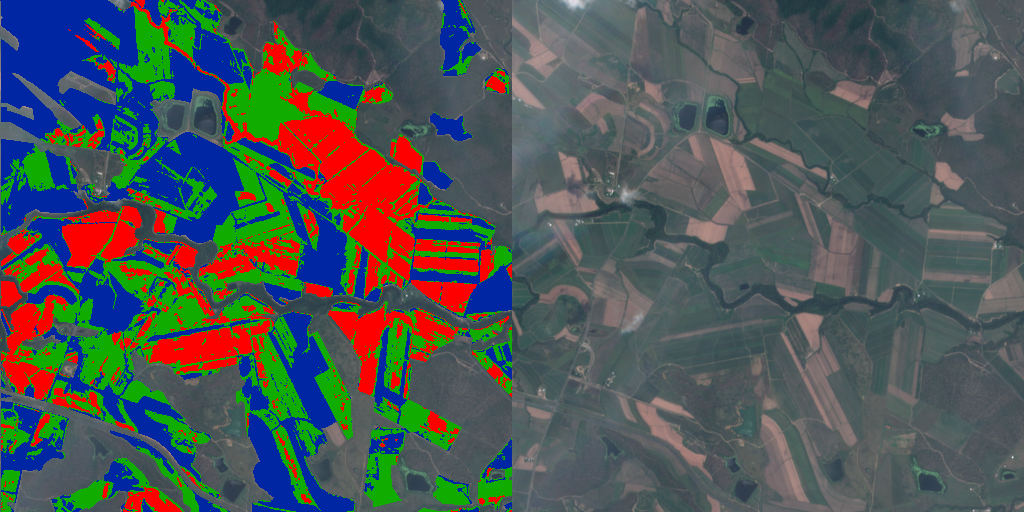

In [177]:
clusterImg = Image.fromarray(np.hstack((imgnp, np.array(tci))))
clusterImg

In [65]:
vegiClustered_df

x   y  prediction
0      0   0           2
1      0   1           2
2      0   2           2
3      0   3           2
4      0   4           2
5      0   5           2
6      0   6           2
7      0   7           2
8      0   8           2
9      0   9           2
10     0  10           2
11     0  11           2
12     0  12           3
13     0  13           2
14     0  14           2
15     0  15           3
16     0  16           3
17     0  17           0
18     0  18           0
19     0  19           0
20     0  20           0
21     0  21           0
22     0  22           0
23     0  23           0
24     0  24           0
25     0  25           3
26     0  26           2
27     0  27           2
28     0  28           2
29     0  29           2
...   ..  ..         ...
4066  63  34           1
4067  63  35           3
4068  63  36           3
4069  63  37           3
4070  63  38           3
4071  63  39           3
4072  63  40           3
4073  63  41           3
4074  63  42           3
4075  63  43           2
4076  63  44           3
4077  63  45           3
4078  63  46           3
4079  63  47           3
4080  63  48           3
4081  63  49           3
4082  63  50           3
4083  63  51           3
4084  63  52           1
4085  63  53           1
4086  63  54           1
4087  63  55           3
4088  63  56           3
4089  63  57           3
4090  63  58           3
4091  63  59           3
4092  63  60           3
4093  63  61           3
4094  63  62           3
4095  63  63           3

[4096 rows x 3 columns]